## Quasi-random samples

As demonstrated in the [problem formulation](../main_usage/problem_formulation.ipynb) section, 
Monte Carlo integration is by nature a very slow converging method.
One way to improve on converging
The
error in convergence is proportional to $1/\sqrt{K}$ where $K$ is the
number of samples. It is somewhat better with variance reduction
techniques that often reaches errors proportional to $1/K$. For a full
overview of the convergence rate of the various methods, see for example
the excellent book \"handbook of Monte Carlo methods\" by Kroese, Taimre
and Botev `kroese_handbook_2011`. However
as the number of dimensions grows, Monte Carlo convergence rate stays
the same, making it immune to the curse of dimensionality.

### Low-discrepancy sequences

In mathematics, a [low-discrepancy
sequence](https://en.wikipedia.org/wiki/Low-discrepancy_sequence) is a
sequence with the property that for all values of N, its sub-sequence $Q_1,
\dots, Q_N$ has a low discrepancy.

Roughly speaking, the discrepancy of a sequence is low if the proportion
of points in the sequence falling into an arbitrary set B is close to
proportional to the measure of B, as would happen on average (but not
for particular samples) in the case of an equi-distributed sequence.
Specific definitions of discrepancy differ regarding the choice of B
(hyper-spheres, hyper-cubes, etc.) and how the discrepancy for every B is
computed (usually normalized) and combined (usually by taking the worst
value).

Low-discrepancy sequences are also called quasi-random or sub-random
sequences, due to their common use as a replacement of uniformly
distributed random numbers. The \"quasi\" modifier is used to denote
more clearly that the values of a low-discrepancy sequence are neither
random nor pseudo-random, but such sequences share some properties of
random variables and in certain applications such as the quasi-Monte
Carlo method their lower discrepancy is an important advantage.

In `chaospy`, the following low-discrepancy schemes exists and can be evoked by passing the appropriate `rule` flag to [chaospy.Distribution.sample()](../../api/chaospy.Distribution.sample.rst) method:

In [1]:
import chaospy

uniform_cube = chaospy.J(chaospy.Uniform(0, 1), chaospy.Uniform(0, 1))
count = 300

random_samples = uniform_cube.sample(count, rule="random", seed=1234)

additive_samples = uniform_cube.sample(count, rule="additive_recursion")
halton_samples = uniform_cube.sample(count, rule="halton")
hammersley_samples = uniform_cube.sample(count, rule="hammersley")
korobov_samples = uniform_cube.sample(count, rule="korobov")
sobol_samples = uniform_cube.sample(count, rule="sobol")

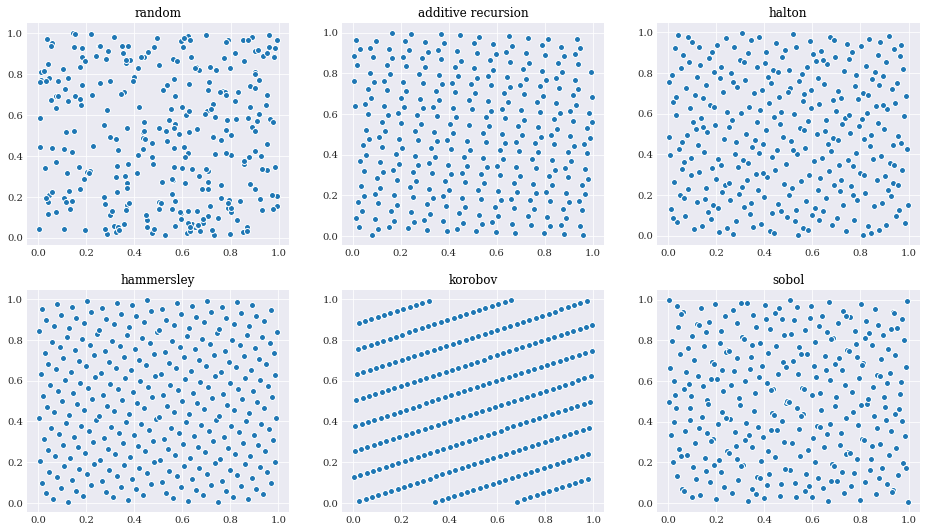

In [2]:
from matplotlib import pyplot

pyplot.rc("figure", figsize=[16, 9])

pyplot.subplot(231)
pyplot.scatter(*random_samples)
pyplot.title("random")

pyplot.subplot(232)
pyplot.scatter(*additive_samples)
pyplot.title("additive recursion")

pyplot.subplot(233)
pyplot.scatter(*halton_samples)
pyplot.title("halton")

pyplot.subplot(234)
pyplot.scatter(*hammersley_samples)
pyplot.title("hammersley")

pyplot.subplot(235)
pyplot.scatter(*korobov_samples)
pyplot.title("korobov")

pyplot.subplot(236)
pyplot.scatter(*sobol_samples)
pyplot.title("sobol")

pyplot.show()

It is easy to observe by eye that for the average distance between each sample is much smaller for the sequences than the random samples.

All of these methods are deterministic, so running the same code again, and you will result in the same samples.

### Antithetic variate

Create [antithetic
variate](https://en.wikipedia.org/wiki/Antithetic_variates) from
variables on the unit hyper-cube.

In statistics, the antithetic variate method is a variance reduction
technique used in Monte Carlo methods. It does so by doing a type of mirroring of samples.
In chaospy we can create antithetic variate by providing the `antithetic=True` flag to the [chaospy.Distribution.sample()](../../api/chaospy.Distribution.sample.rst) method:

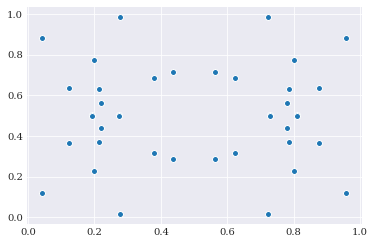

In [3]:
antithetic_samples = uniform_cube.sample(40, antithetic=True, seed=1234)

pyplot.rc("figure", figsize=[6, 4])
pyplot.scatter(*antithetic_samples)
pyplot.show()

Since the uniform distribution i fully symmetrical it is possible to observe the mirroring visually.
Looking at the 16 samples here, it is possible to interpret it as 10 unique samples, which are mirrored three times: along the x-axis, y-axis and the x-y-diagonal.

Antithetic variate does not scale too well into higher dimensions, as the number of mirrored samples to normal samples grows exponentially.
So in higher dimensional problems it is possible to limit the mirroring to include only a few dimensions of interest by passing a Boolean sequence as the `antithetic` flag:

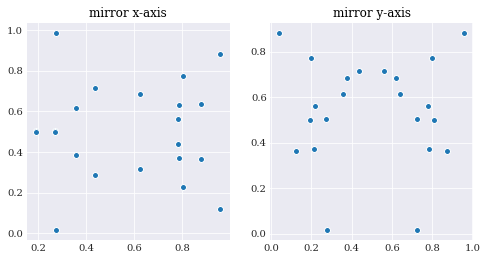

In [4]:
pyplot.rc("figure", figsize=[8, 4])

pyplot.subplot(121)
pyplot.scatter(*uniform_cube.sample(40, antithetic=[False, True], seed=1234))
pyplot.title("mirror x-axis")

pyplot.subplot(122)
pyplot.scatter(*uniform_cube.sample(40, antithetic=[True, False], seed=1234))
pyplot.title("mirror y-axis")

pyplot.show()

Here 20 samples are generated and mirror along a single axis, which is twice as many as in the first try.

### Latin hyper-cube sampling

[Latin hyper-cube sampling](https://en.wikipedia.org/wiki/Latin_hypercube_sampling) is a stratification scheme for forcing random samples to be placed more spread out than traditional random samples.
It is similar to the low discrepancy sequences, but maintain random samples at it core.

Generating latin hyper-cube samples can be done by passing the `rule="latin_hypercube"` flag to [chaospy.Distribution.sample()](../../api/chaospy.Distribution.sample.rst):

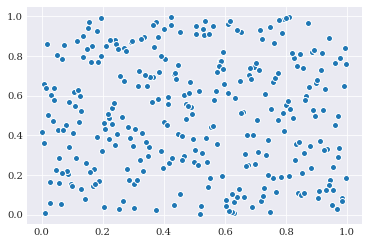

In [5]:
pyplot.rc("figure", figsize=[6, 4])

lhc_samples = uniform_cube.sample(count, rule="latin_hypercube", seed=1234)

pyplot.scatter(*lhc_samples)
pyplot.show()